In [12]:
# setup
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from keras import models
from keras.layers import Dense
import keras.utils as ku
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.layers.core import Activation
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Load the CIFAR10 data and split the data into training and testing subset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images_subs= train_images[np.where(train_labels[:,0] < 3)[0],:]
train_labels_subs = train_labels[np.where(train_labels[:,0] < 3)[0],:]
test_images_subs = test_images[np.where(test_labels[:,0] < 3)[0],:]
test_labels_subs = test_labels[np.where(test_labels[:,0] < 3)[0],:]
print(train_images_subs.shape)
print(train_labels_subs.shape)
print(test_images_subs.shape)
print(test_labels_subs.shape)

(15000, 32, 32, 3)
(15000, 1)
(3000, 32, 32, 3)
(3000, 1)


In [14]:
# convert the training_labels_subset and testing_labels_subset to canonical encoding 
# Applying the function to training set labels and testing set labels

from tensorflow.keras.utils import to_categorical
train_labels_subs = to_categorical(train_labels_subs,3)
test_labels_subs = to_categorical(test_labels_subs,3)


train_images_subs= train_images_subs.astype('float')/255.0
test_images_subs = test_images_subs.astype('float')/255.0


train_val = train_images_subs[:3000]
partial_train_val = train_images_subs[3000:]
train_lab_val = train_labels_subs[:3000]
partial_train_lab_val = train_labels_subs[3000:]



In [15]:
# model training fit method 
# Trains the model for a fixed number of epochs (iterations on a dataset)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape = (32, 32, 3)))
model.add(Activation('relu'))
model.add(layers.Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer=SGD(lr=0.01, decay = 1e-6, momentum=0.9, nesterov = True), loss='categorical_crossentropy' ,metrics = ['accuracy'])



history=model.fit(
    partial_train_val, partial_train_lab_val,
    epochs = 60,
    batch_size = 512,
    validation_data = (train_val, train_lab_val))

history_dict = history.history
history_dict.keys()


Epoch 1/60
24/24 [==============================] - 1s 22ms/step - loss: 1.2470 - accuracy: 0.4866 - val_loss: 0.9549 - val_accuracy: 0.5173
Epoch 2/60
24/24 [==============================] - 0s 15ms/step - loss: 0.8828 - accuracy: 0.6511 - val_loss: 0.7531 - val_accuracy: 0.7230
Epoch 3/60
24/24 [==============================] - 0s 16ms/step - loss: 0.7496 - accuracy: 0.6996 - val_loss: 0.6555 - val_accuracy: 0.7543
Epoch 4/60
24/24 [==============================] - 0s 18ms/step - loss: 0.6659 - accuracy: 0.7418 - val_loss: 0.5967 - val_accuracy: 0.7680
Epoch 5/60
24/24 [==============================] - 0s 18ms/step - loss: 0.6288 - accuracy: 0.7564 - val_loss: 0.6036 - val_accuracy: 0.7560
Epoch 6/60
24/24 [==============================] - 0s 14ms/step - loss: 0.5864 - accuracy: 0.7690 - val_loss: 0.6121 - val_accuracy: 0.7430
Epoch 7/60
24/24 [==============================] - 0s 13ms/step - loss: 0.5736 - accuracy: 0.7728 - val_loss: 0.5135 - val_accuracy: 0.8000
Epoch 8/60
24

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

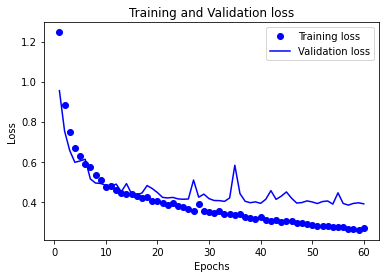

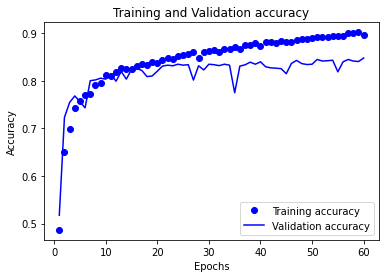

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs,val_loss_values, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochss = range(1, len(acc_values) + 1)

plt.plot(epochss, acc_values, 'bo', label= 'Training accuracy')
plt.plot(epochss,val_acc_values, 'b', label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
sgd = SGD(lr=0.001,decay = 1e-6,momentum=0.9,nesterov=True)
model.compile(
    optimizer=sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_images_subs,train_labels_subs,epochs=60,batch_size=64)
results=model.evaluate(test_images_subs,test_labels_subs)
print(results)

Epoch 1/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2799 - accuracy: 0.8929
Epoch 2/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2747 - accuracy: 0.8947
Epoch 3/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2732 - accuracy: 0.8967
Epoch 4/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2691 - accuracy: 0.8953
Epoch 5/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2669 - accuracy: 0.8971
Epoch 6/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2649 - accuracy: 0.8987
Epoch 7/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2622 - accuracy: 0.9001
Epoch 8/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2605 - accuracy: 0.9004
Epoch 9/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2571 - accuracy: 0.9021
Epoch 10/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2551 - accuracy: 0.9019

In [18]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


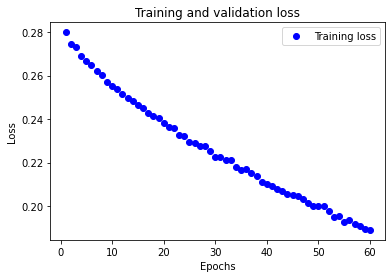

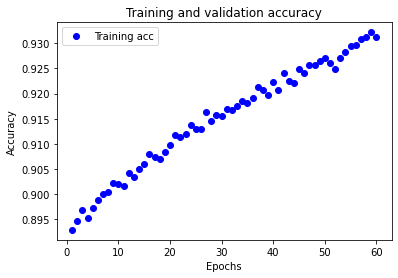

In [19]:
import matplotlib.pyplot as plt
loss = history_dict['loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss') 
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

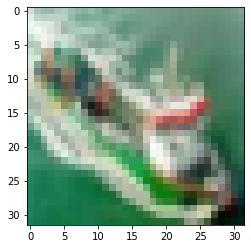

In [22]:
#Save the model
model.save('task2.hdf5')

# Load the model weights
model.load_weights('task2.hdf5')

# Display and verify the training data
plt.imshow(test_images[15])

In [23]:
# Make a prediction
model.predict(test_images[10:11])

array([[1., 0., 0.]], dtype=float32)